### Probability

Probability is the mathematical field concerned with reasoning under uncertainty.


When we have a coin with an unknown bias (we don’t know if it’s fair or unfair), our goal is to estimate the probability of landing heads. A natural way to estimate this probability is by sampling, or in simpler terms, tossing the coin multiple times and recording the outcomes.

The estimator for the probability of heads can be the ratio of heads observed to the total number of tosses:

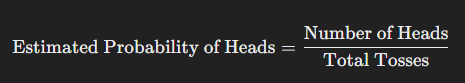

In Python, the function random.random() generates a float between 0 and 1. Because it’s uniformly distributed:

- The probability of getting a number between 0 and 0.5 is 0.5.
- The probability of getting a number between 0.5 and 1 is also 0.5.

In [2]:
import random

num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails:", [heads, tails])

heads, tails: [51, 49]


More generally, we can simulate multiple draws from any variable with a finite number of possible outcomes (like the toss of a coin or roll of a die) by calling the multinomial function, setting the first argument to the number of draws and the second as a list of probabilities associated with each of the possible outcomes.

In [3]:
import torch
from torch.distributions.multinomial import Multinomial

fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([52., 48.])

Each time you run this sampling process, you will receive a new random value that may differ from the previous outcome. Dividing by the number of tosses gives us the frequency of each outcome in our data

In [4]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.4800, 0.5200])

In general, for averages of repeated events (like coin tosses), as the number of repetitions grows, our estimates are guaranteed to converge to the true underlying probabilities. The mathematical formulation of this phenomenon is called the law of large numbers and the central limit theorem tells us that in many situations, as the sample size 
 grows, these errors should go down at a rate of (1 / root(N))

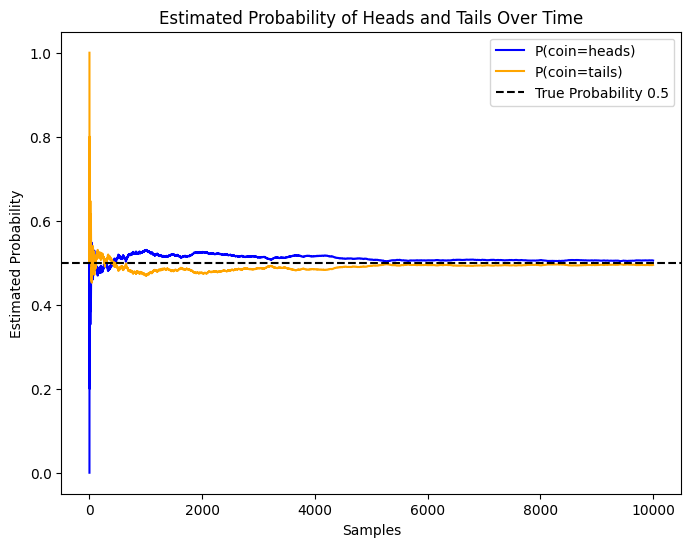

In [8]:
import matplotlib.pyplot as plt

counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

plt.figure(figsize=(8, 6))
plt.plot(estimates[:, 0], label="P(coin=heads)", color="blue")
plt.plot(estimates[:, 1], label="P(coin=tails)", color="orange")
plt.axhline(y=0.5, color='black', linestyle='dashed', label="True Probability 0.5")

plt.xlabel("Samples")
plt.ylabel("Estimated Probability")
plt.legend()
plt.title("Estimated Probability of Heads and Tails Over Time")
plt.show()

Each solid curve corresponds to one of the two values of the coin and gives our estimated probability that the coin turns up that value after each group of experiments. The dashed black line gives the true underlying probability. As we get more data by conducting more experiments, the curves converge towards the true probability

### Expectations

Often, making decisions requires not just looking at the probabilities assigned to individual events but composing them together into useful aggregates that can provide us with guidance. For example, when random variables take continuous scalar values, we often care about knowing what value to expect on average. This is known as expectation.

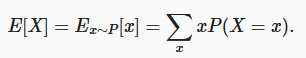